In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime


In [16]:
data = pd.read_csv("yahoo_stock.csv")
display(data.head(10))

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
5,2015-11-28,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
6,2015-11-29,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107
7,2015-11-30,2093.810059,2080.409912,2090.949951,2080.409912,4.275030e+09,2080.409912
8,2015-12-01,2103.370117,2082.929932,2082.929932,2102.629883,3.712120e+09,2102.629883
9,2015-12-02,2104.270020,2077.110107,2101.709961,2079.510010,3.950640e+09,2079.510010


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1825 non-null   object 
 1   High       1825 non-null   float64
 2   Low        1825 non-null   float64
 3   Open       1825 non-null   float64
 4   Close      1825 non-null   float64
 5   Volume     1825 non-null   float64
 6   Adj Close  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.9+ KB


In [18]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1825.000000
mean,2660.718673,2632.817580,2647.704751,2647.856284,3.869627e+09,2647.856284
std,409.680853,404.310068,407.169994,407.301177,1.087593e+09,407.301177
min,1847.000000,1810.099976,1833.400024,1829.079956,1.296540e+09,1829.079956
25%,2348.350098,2322.250000,2341.979980,2328.949951,3.257950e+09,2328.949951
50%,2696.250000,2667.840088,2685.489990,2683.340088,3.609740e+09,2683.340088
75%,2930.790039,2900.709961,2913.860107,2917.520020,4.142850e+09,2917.520020
max,3645.989990,3600.159912,3612.090088,3626.909912,9.044690e+09,3626.909912


In [ ]:
#Convert "Date" entrance from type object to type datetime
data["Date"] = pd.to_datetime(data["Date"])
data["Date"].min(), data["Date"].max()

In [9]:
data.set_index("Date", inplace=True)
print(data.head())
data.tail()


                   High          Low         Open        Close        Volume  \
Date                                                                           
2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088  3.587980e+09   
2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893  3.884930e+09   
2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117  2.852940e+09   
2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107  1.466840e+09   

              Adj Close  
Date                     
2015-11-23  2086.590088  
2015-11-24  2089.139893  
2015-11-25  2088.870117  
2015-11-26  2088.870117  
2015-11-27  2090.110107  


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912
2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029
2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039
2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117
2020-11-20,3581.229980,3556.850098,3579.310059,3557.540039,2.236662e+09,3557.540039


Text(0.5, 1.0, 'Price over time for high, low, open and close values')

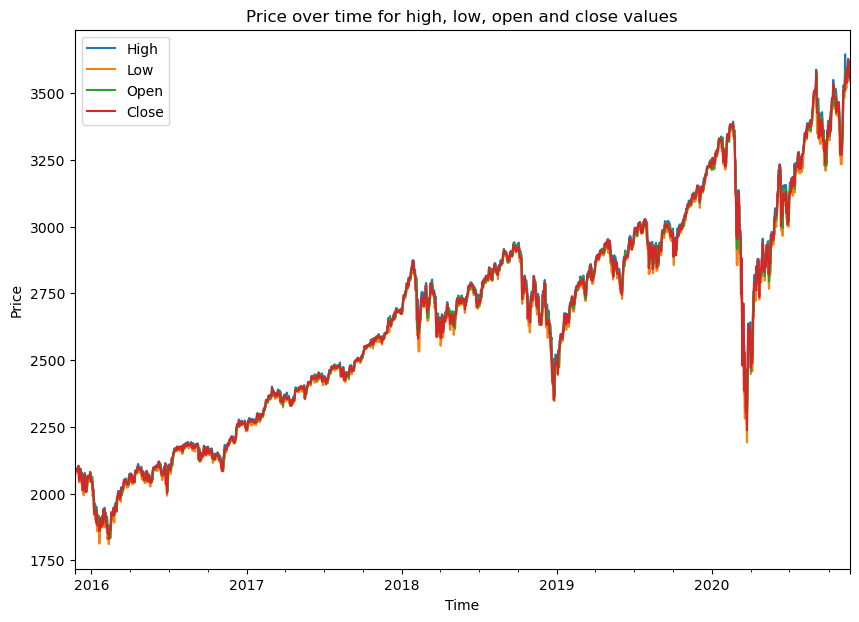

In [10]:
data[["High", "Low", "Open", "Close"]].plot(figsize=(10,7))
plt.legend(loc="best")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price over time for high, low, open and close values")

<Figure size 1600x800 with 0 Axes>

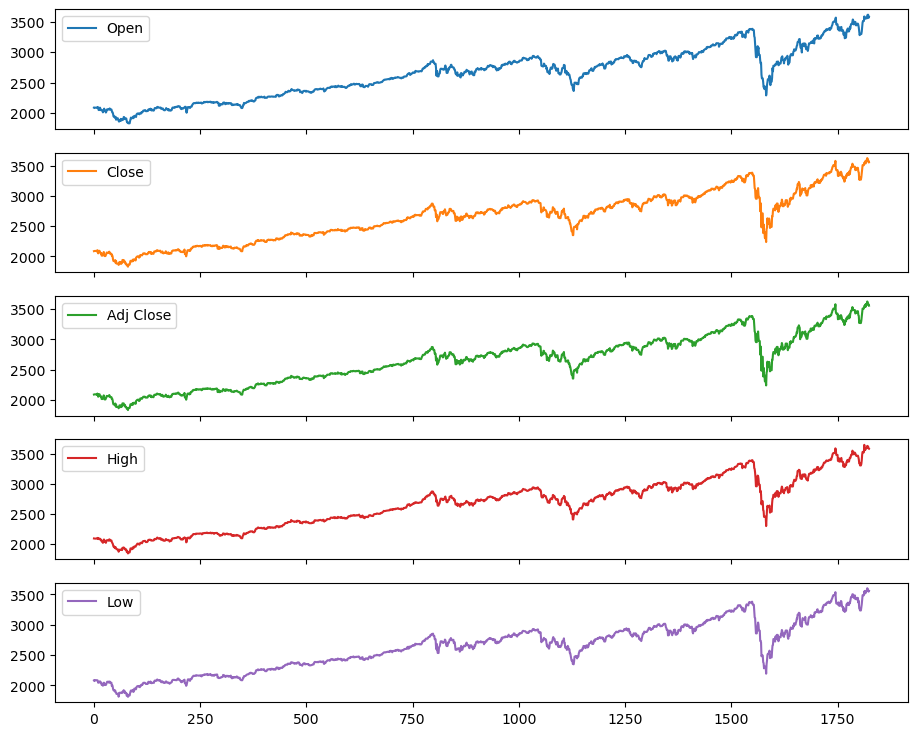

In [19]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Adj Close', 'High', 'Low']
axes = data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

<AxesSubplot:>

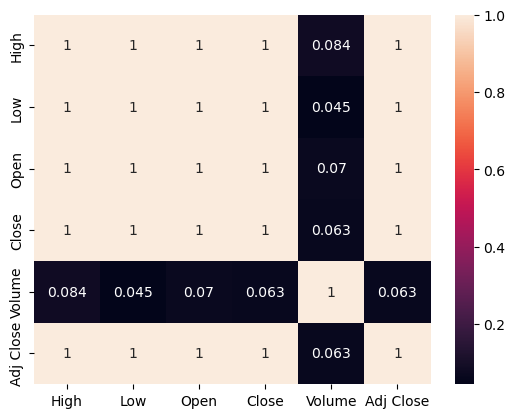

In [20]:
corr = data.corr()
sns.heatmap(corr, annot=True)

High corelation between entries High, Low, Open, Close and Adj Close - Should drop values with high correlation?